In [1]:
# Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from scipy import stats

# My Telco Labor
import telco_wrangle

# My zillow labor
import wrangle

# Hide Pink Boxes
import warnings
warnings.filterwarnings("ignore")


# Exercise 1: Telco

### Our Telco scenario continues:

### As a customer analyst for Telco, you want to know who has spent the most money with the company over their lifetime. You have monthly charges and tenure, so you think you will be able to use those two attributes as features to estimate total charges. You need to do this within an average of $5.00 per customer.

### In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.






### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.



In [2]:
# Should our data be scaled for this? Probably?
train, validate, test = telco_wrangle.split_this_data(telco_wrangle.clean_telco(telco_wrangle.get_telco_data()))

In [3]:
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,is_male,has_partner,has_dependent,has_phone_service,has_paperless_billing,has_churned,...,internet_service_type_DSL,internet_service_type_fiber_optic,internet_service_type_None,payment_type_bank_transfer_A,payment_type_credit_card_A,payment_type_electronic_check_M,payment_type_mailed_check_M,month_to_month_contract,one_year_contract,two_year_contract
4339,0,25,71.05,1837.70,0,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
2680,1,44,89.15,3990.75,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1147,0,35,95.50,3418.20,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
755,1,38,102.60,4009.20,1,1,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
4463,0,8,43.45,345.50,1,1,1,1,1,0,...,1,0,0,0,0,0,1,0,1,0


In [4]:
# Looking at correlations 
train.corr()['has_churned']

senior_citizen                           0.137053
tenure                                  -0.363998
monthly_charges                          0.184489
total_charges                           -0.212966
is_male                                 -0.020294
has_partner                             -0.160889
has_dependent                           -0.157729
has_phone_service                        0.003720
has_paperless_billing                    0.204327
has_churned                              1.000000
multiple_lines_no_phone_service         -0.003720
has_multiple_lines                       0.038407
online_security_no_internet_service     -0.231605
has_online_security                     -0.184236
online_backup_no_internet_service       -0.231605
has_online_backup                       -0.083648
device_protection_no_internet_service   -0.231605
has_device_protection                   -0.073265
tech_support_no_internet_service        -0.231605
has_tech_support                        -0.172862


### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.



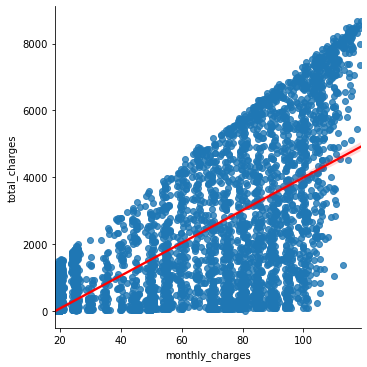

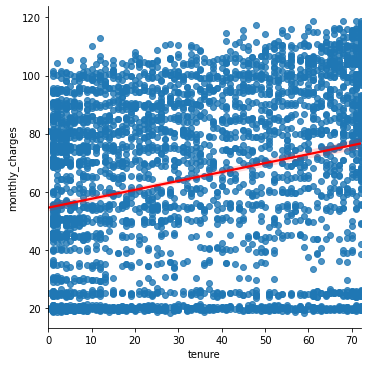

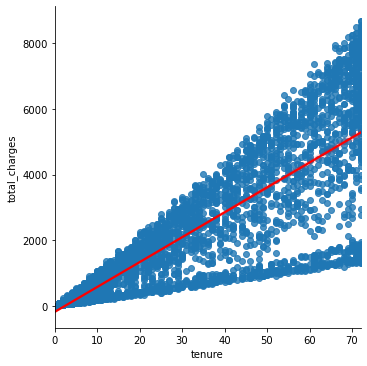

In [5]:
# I'm gonna look at some plots for continuous features
sns.lmplot(data=train, x='monthly_charges', y='total_charges', line_kws={'color':'red'})
sns.lmplot(data=train, x='tenure', y='monthly_charges', line_kws={'color':'red'})
sns.lmplot(data=train, x='tenure', y='total_charges', line_kws={'color':'red'});

In [6]:
def plot_variable_pairs(df):
    sns.lmplot(data=df, x='monthly_charges', y='total_charges', line_kws={'color':'red'})
    sns.lmplot(data=df, x='tenure', y='monthly_charges', line_kws={'color':'red'})
    sns.lmplot(data=df, x='tenure', y='total_charges', line_kws={'color':'red'})
    plt.show()
    return train.corr()['has_churned']

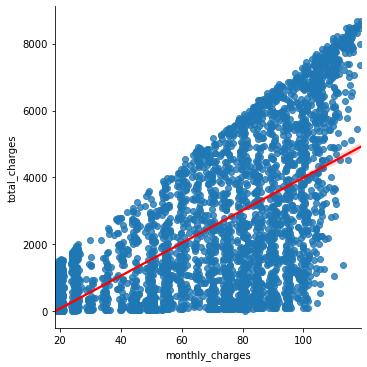

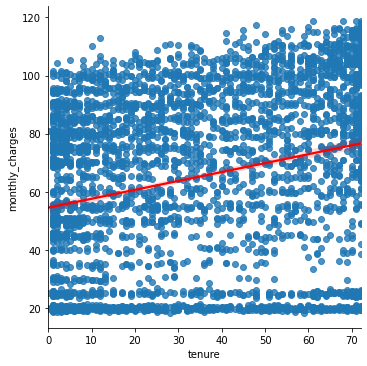

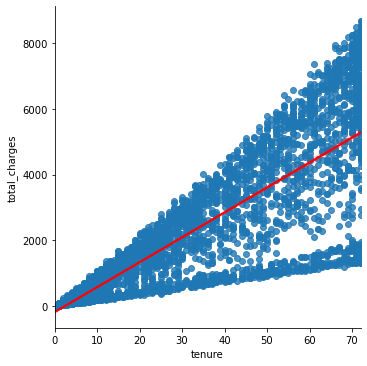

senior_citizen                           0.137053
tenure                                  -0.363998
monthly_charges                          0.184489
total_charges                           -0.212966
is_male                                 -0.020294
has_partner                             -0.160889
has_dependent                           -0.157729
has_phone_service                        0.003720
has_paperless_billing                    0.204327
has_churned                              1.000000
multiple_lines_no_phone_service         -0.003720
has_multiple_lines                       0.038407
online_security_no_internet_service     -0.231605
has_online_security                     -0.184236
online_backup_no_internet_service       -0.231605
has_online_backup                       -0.083648
device_protection_no_internet_service   -0.231605
has_device_protection                   -0.073265
tech_support_no_internet_service        -0.231605
has_tech_support                        -0.172862


In [7]:
plot_variable_pairs(train)

### 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.



In [8]:
def months_to_years(telco):
    telco["tenure_years"] = (round(telco.tenure/12)).astype(int)
    return telco

In [9]:
train  = months_to_years(train)
train.head()

,senior_citizen,tenure,monthly_charges,total_charges,is_male,has_partner,has_dependent,has_phone_service,has_paperless_billing,has_churned,...,internet_service_type_fiber_optic,internet_service_type_None,payment_type_bank_transfer_A,payment_type_credit_card_A,payment_type_electronic_check_M,payment_type_mailed_check_M,month_to_month_contract,one_year_contract,two_year_contract,tenure_years
4339,0,25,71.05,1837.70,0,1,0,1,1,0,...,0,0,0,0,0,1,1,0,0,2
2680,1,44,89.15,3990.75,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,4
1147,0,35,95.50,3418.20,1,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,3
755,1,38,102.60,4009.20,1,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,3
4463,0,8,43.45,345.50,1,1,1,1,1,0,...,0,0,0,0,0,1,0,1,0,1


### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.



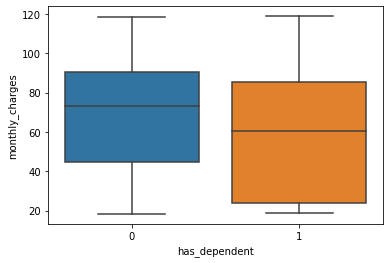

In [10]:
# Oh dear, let's see what charts would work here...
# Maybe a boxplot?
sns.boxplot(x='has_dependent', y='monthly_charges', data=train);

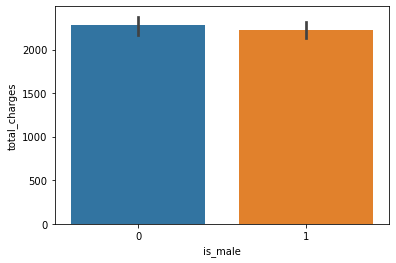

In [11]:
# Barplots are always good, right?
sns.barplot(x='is_male', y='total_charges', data=train);

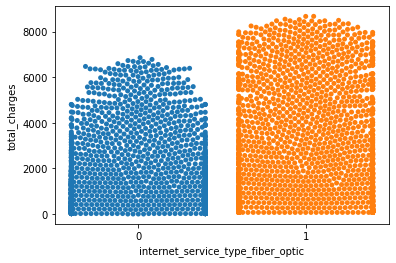

In [12]:
# I don't see the merit of swarmplots but I'll look at some anyway
sns.swarmplot(x='internet_service_type_fiber_optic', y='total_charges', data=train);

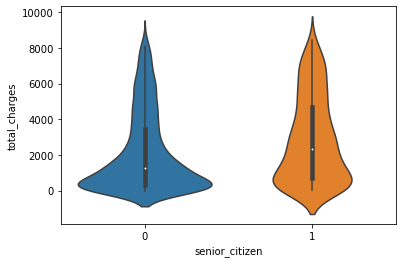

In [13]:
# Violin plots feel like filled in swarm plots.
sns.violinplot(data = train, y = "total_charges", x="senior_citizen");

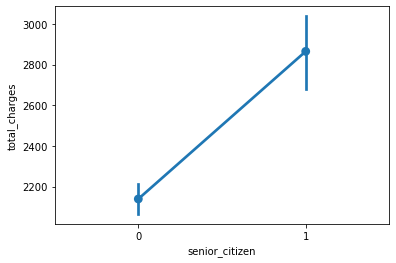

In [14]:
# What's a point plot again?
sns.pointplot(data = train, y = "total_charges", x="senior_citizen");

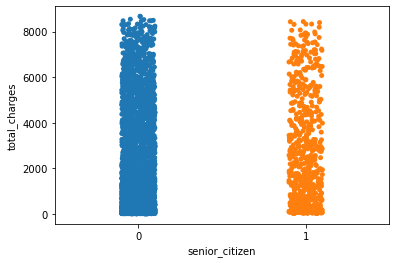

In [15]:
# Oh, there's also a strip plot. Let's see what that looks like
sns.stripplot(data = train, y = "total_charges", x="senior_citizen");

In [16]:
# Alright, well I guess I'll just pick three and go from there
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    # Loop through the list of continuous variables
    for con in continuous:
        # Loop through categorical list, comparing to the current categorical
        for cat in categorical:
            # Plot three plots of the current continuous and categorical
            plt.figure(figsize = (20,10))
            plt.subplot(1,3,1)
            sns.barplot(x=df[cat], y=df[con], data=df)
            plt.subplot(1,3,2)
            sns.stripplot(x=df[cat], y=df[con], data=df)
            plt.subplot(1,3,3)
            sns.boxplot(x=df[cat], y=df[con], data=df)
            return plt.show()

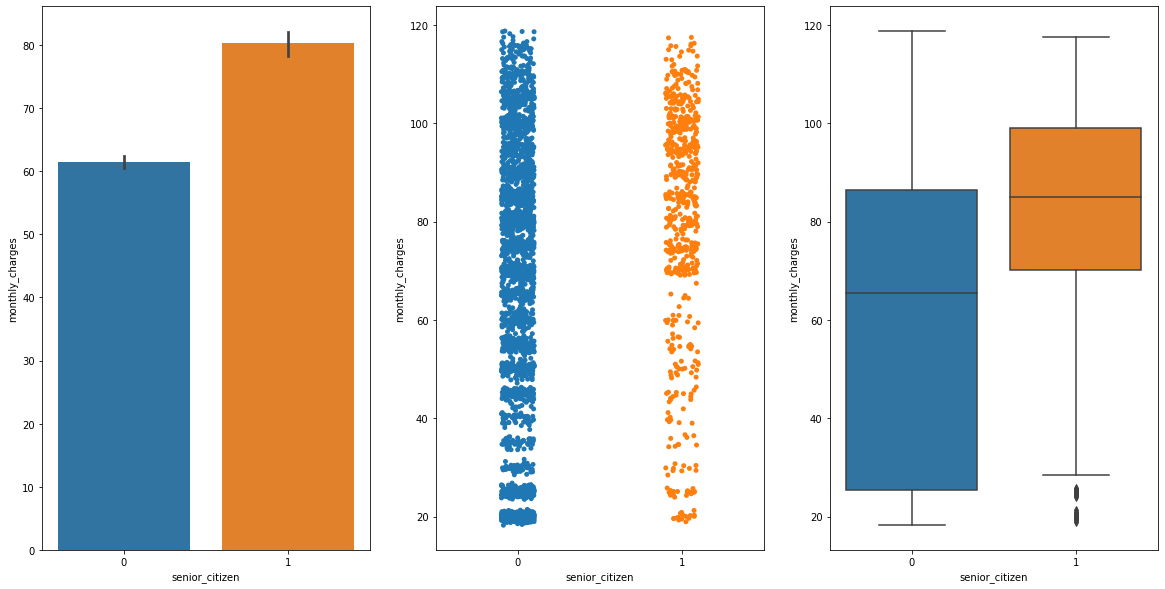

In [17]:
# To save on time and processing, I'm not gonna do all my telco columns
categorical = ['senior_citizen', 'is_male', 'has_partner', 'has_dependent', 'has_phone_service', 'has_churned']
continuous = ['monthly_charges','total_charges']

# Now to test it
plot_categorical_and_continuous_vars(train, categorical, continuous)

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.



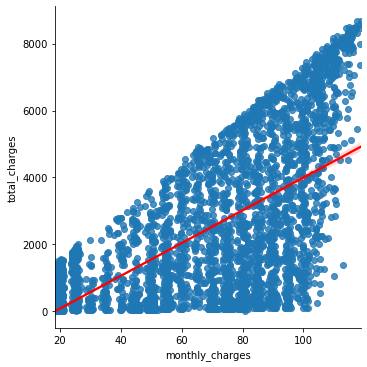

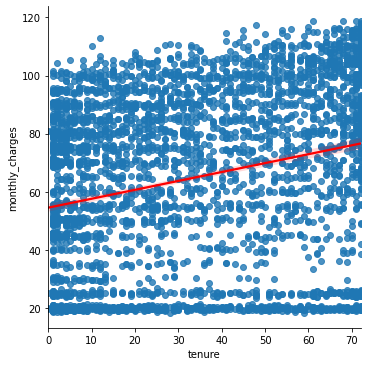

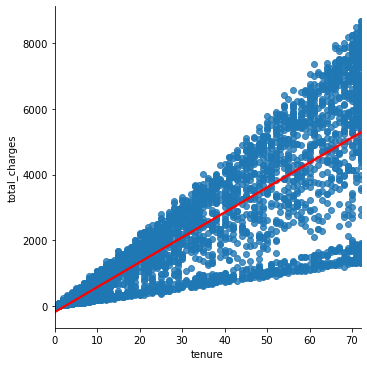

senior_citizen                           0.137053
tenure                                  -0.363998
monthly_charges                          0.184489
total_charges                           -0.212966
is_male                                 -0.020294
has_partner                             -0.160889
has_dependent                           -0.157729
has_phone_service                        0.003720
has_paperless_billing                    0.204327
has_churned                              1.000000
multiple_lines_no_phone_service         -0.003720
has_multiple_lines                       0.038407
online_security_no_internet_service     -0.231605
has_online_security                     -0.184236
online_backup_no_internet_service       -0.231605
has_online_backup                       -0.083648
device_protection_no_internet_service   -0.231605
has_device_protection                   -0.073265
tech_support_no_internet_service        -0.231605
has_tech_support                        -0.172862


In [18]:
import explore

# Test
explore.plot_variable_pairs(train)

# Exercise 2: Zillow

### 1. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [23]:
# Grabbing my zillow dataframe
train, validate, test = wrangle.wrangle_zillow()

# Scaling it
train, validate, test = wrangle.Min_Max_Scaler(train, validate, test)

# Should be good to go!

#### Target Variable is `taxvaluedollarcnt` or in my case `tax_value`


### 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair

In [24]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1901200,2,2.0,1205.0,0.372953,1941,0.422635,6037
1786912,5,2.0,1586.0,0.201887,2004,0.298982,6037
930919,2,1.0,860.0,0.223268,1952,0.258308,6037
1805072,2,1.0,1125.0,0.660917,1948,0.786753,6037
1775847,3,2.5,1731.0,0.559436,2002,0.550856,6111
